<a href="https://colab.research.google.com/github/AquibPy/Colorized-B-W-to-colored-Images/blob/master/Colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v2/colorization_release_v2.caffemodel


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

**Define Model Path**

In [ ]:
prototxt = "/content/colorization_deploy_v2.prototxt"
model = "/content/colorization_release_v2.caffemodel"
points = "/content/pts_in_hull.npy"
image = "/content/soldiers_1941.jpg"

**Load Serialized Black and white colorizer model and cluster**

In [ ]:
net = cv2.dnn.readNetFromCaffe(prototxt,model)
pts = np.load(points)

**Add cluster Center as 1*1 convolutions to the model**

In [ ]:
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2,313,1,1)
net.getLayer(class8).blobs = [pts.astype('float32')]
net.getLayer(conv8).blobs = [np.full([1,313],2.606,dtype="float32")]

**Load the input image, scale it and convert it to Lab**

In [ ]:
image = cv2.imread(image)
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)

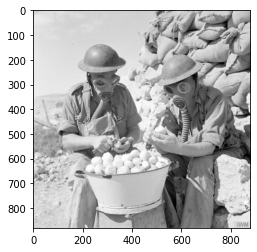

In [ ]:
plt.imshow(image)

**Extracting “L”**

In [ ]:
scaled = image.astype('float32') /255.0
lab = cv2.cvtColor(scaled,cv2.COLOR_RGB2LAB)
resized = cv2.resize(lab,(224,224))
L = cv2.split(resized)[0]
L = L - 50

**Predicting “a” and “b”**

In [ ]:
net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0,:,:,:].transpose((1,2,0))
ab = cv2.resize(ab,(image.shape[1],image.shape[0]))

**Creating a colorized Lab photo (L + a + b)**

In [ ]:
L = cv2.split(lab)[0]
colorized = np.concatenate((L[:,:,np.newaxis],ab),axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


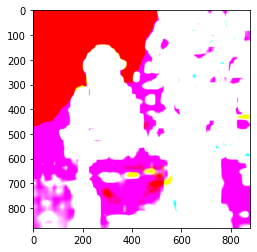

In [ ]:
plt.imshow(colorized)

**Converting to RGB**

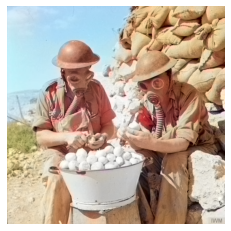

In [ ]:
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2RGB)
colorized = np.clip(colorized, 0, 1)
colorized = (255 * colorized).astype("uint8")
plt.imshow(colorized)
plt.axis('off');